In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("outliers.csv")
df

,Name,Height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


In [31]:
df.iloc[19,1] = 40.2

In [32]:
df

,Name,Height
0,mohan,1.2
1,maria,2.3
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6


# Outlier Treatment

# IQR Method- Inter Quartile Range

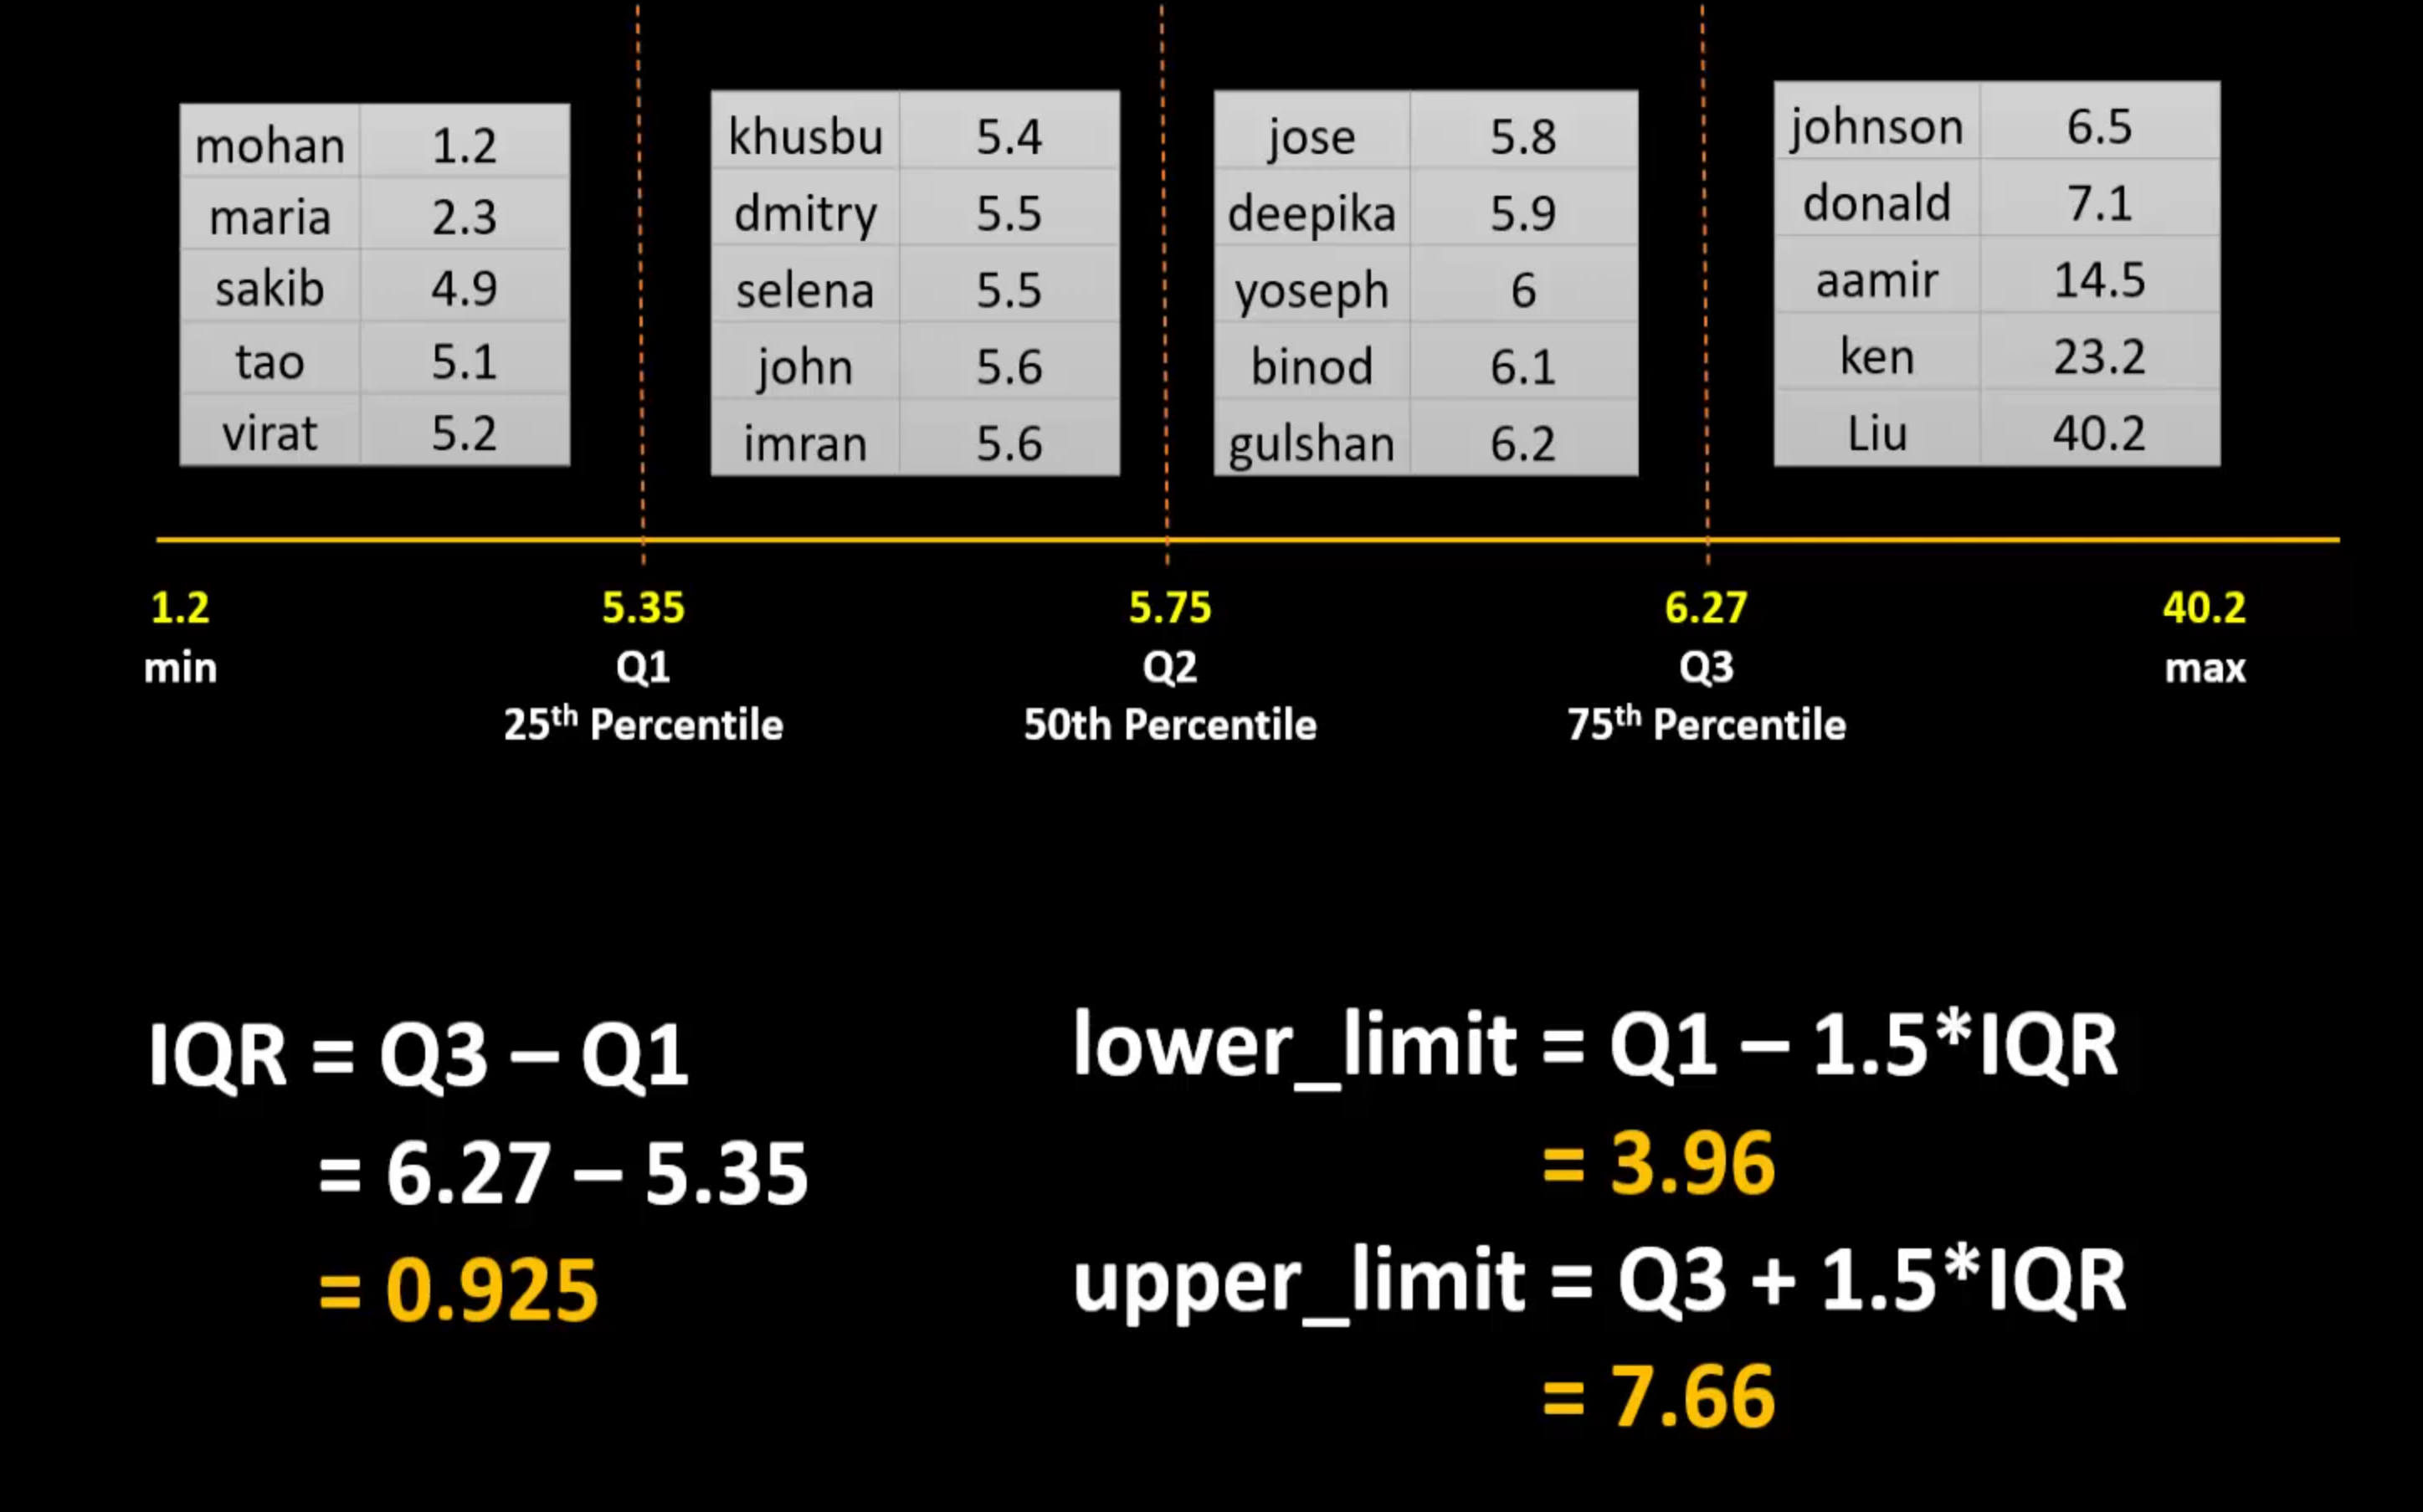

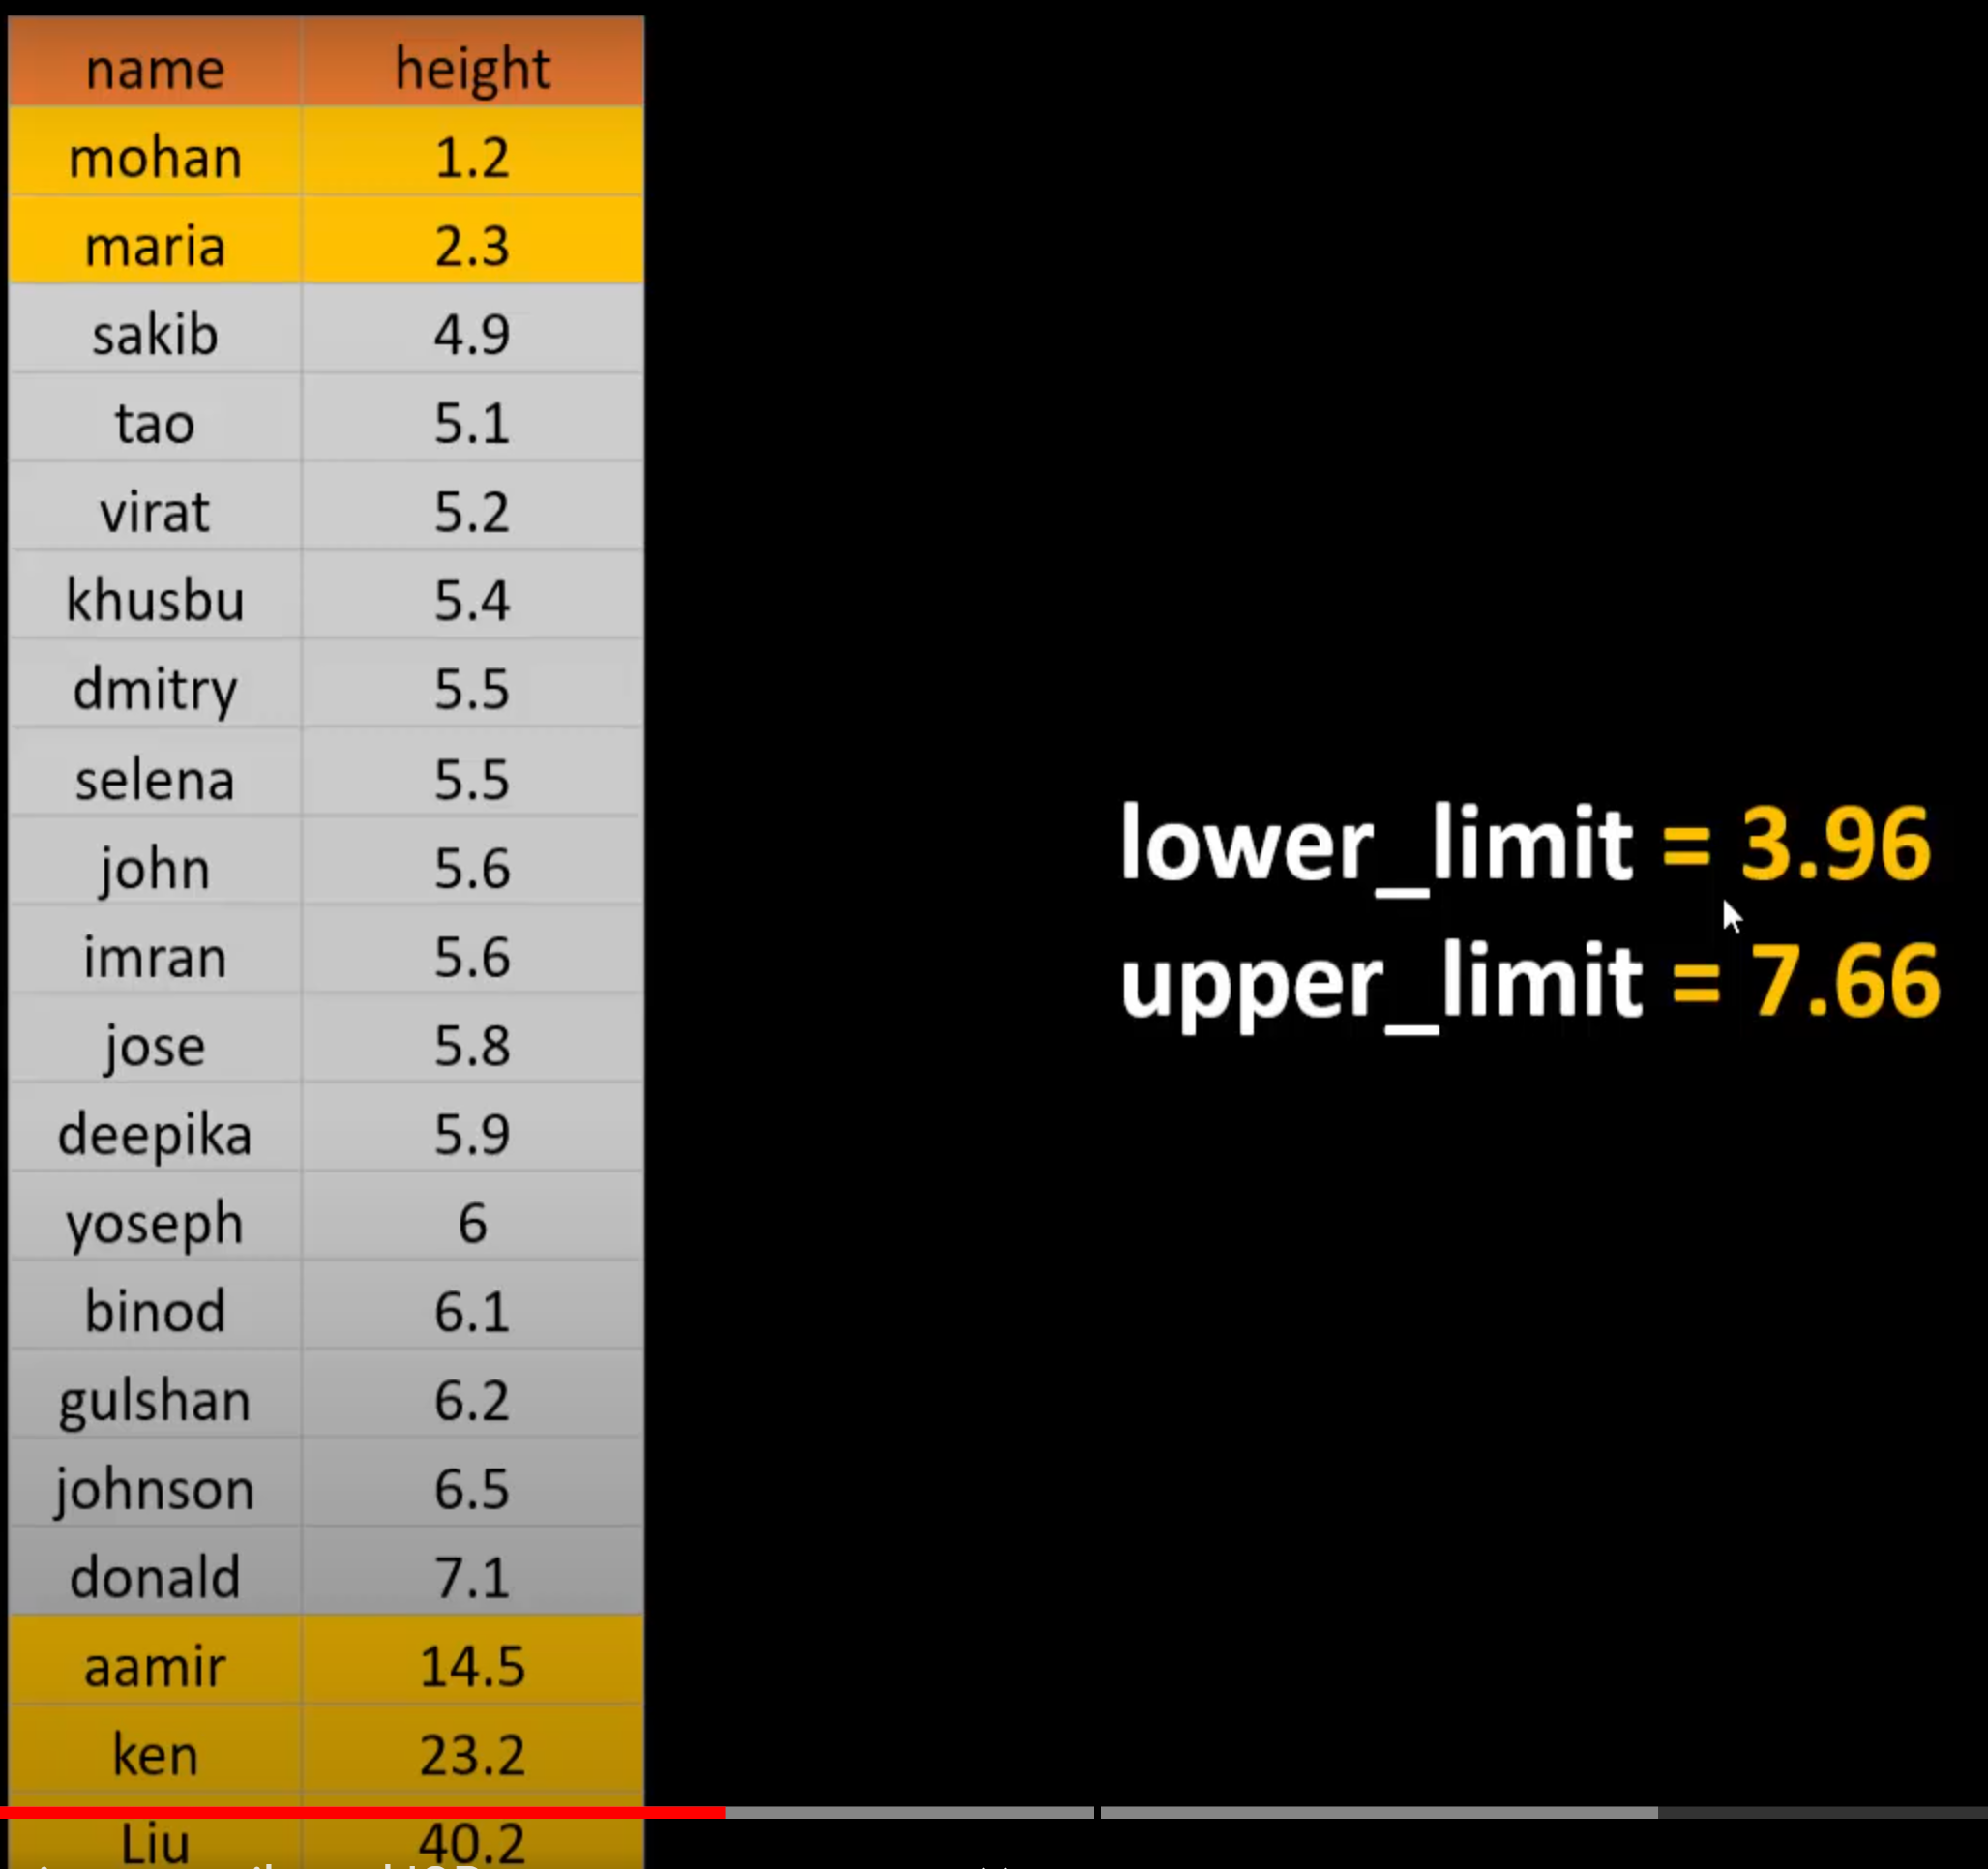

In [33]:
df.describe()

,Height
count,20.000000
mean,8.390000
std,8.782812
min,1.200000
25%,5.350000
50%,5.700000
75%,6.275000
max,40.200000


In [35]:
q1 = df["Height"].quantile(0.25)
q3 = df['Height'].quantile(0.75)
q1,q3

(5.3500000000000005, 6.275)

In [10]:
iqr = q3 - q1
iqr

0.9500000000000002

In [36]:
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
lower_limit, upper_limit

(3.9250000000000003, 7.700000000000001)

In [41]:
df[((df['Height']<lower_limit) | (df['Height']>upper_limit))]

,Name,Height
0,mohan,1.2
1,maria,2.3
17,aamir,14.5
18,ken,23.2
19,Liu,40.2


In [42]:
df_no_outliers = df[((df['Height']>lower_limit)&(df['Height']<upper_limit))]

In [43]:
df_no_outliers

,Name,Height
2,sakib,4.9
3,tao,5.1
4,virat,5.2
5,khusbu,5.4
6,dmitry,5.5
7,selena,5.5
8,john,5.6
9,imran,5.6
10,jose,5.8
11,deepika,5.9


In [44]:
import matplotlib.pyplot as plt

# with outliers

In [77]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

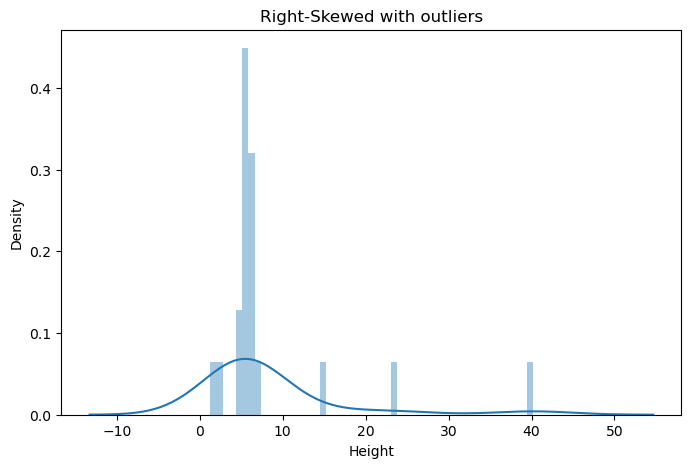

In [79]:
plt.figure(figsize=(8,5))
sns.distplot(df['Height'])
plt.title("Right-Skewed with outliers")
plt.show()

# without outliers

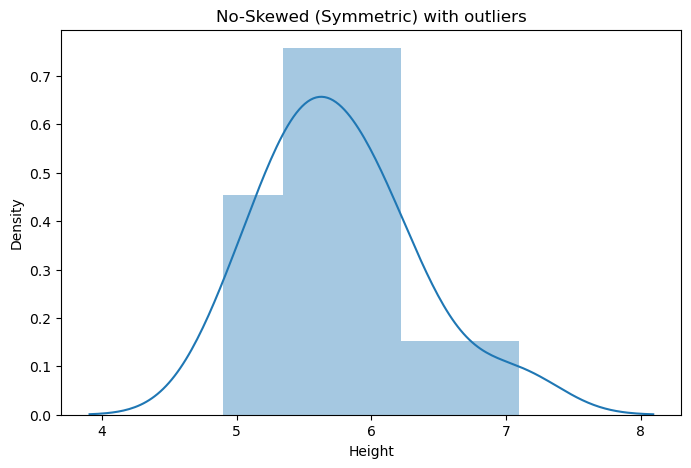

In [80]:
plt.figure(figsize=(8,5))
sns.distplot(df_no_outliers['Height'])
plt.title("No-Skewed (Symmetric) with outliers")
plt.show()

# Skewness is the measure of asymmetry

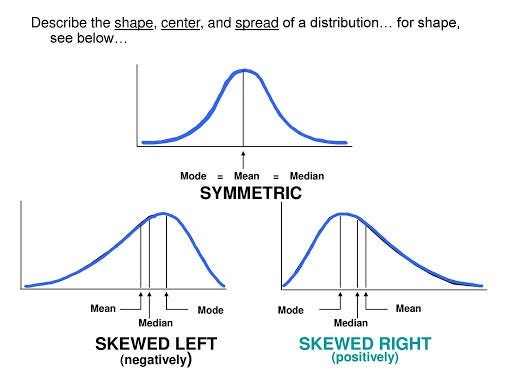

In [81]:
df.skew() #right-skewed

Height    3.000407
dtype: float64

In [82]:
df_no_outliers.skew() #symmetric

Height    0.787995
dtype: float64

In [83]:
df.kurt()

Height    9.552411
dtype: float64

In [84]:
df_no_outliers.kurt()

Height    0.879598
dtype: float64